In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interactive
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, IntSlider, SelectMultiple, interactive_output
import matplotlib.patches as mpatches

In [33]:
# Load the data
missing_df = pd.read_csv('cfpdss_m0.5.csv')
#df = pd.read_csv('cfpdss.csv')
missing_df = missing_df.drop(columns = 'class')
missing_df


,Unnamed: 0,c5,c6,c7,c8,c9,n0,n1,n2,n3,n4
0,0,a,a,b,a,a,0.448573,1.212644,2.555515,0.242702,0.697604
1,1,a,a,a,b,b,1.902515,-0.467349,-0.744523,-0.017156,-0.380288
2,2,a,a,a,b,b,0.825045,1.002267,1.972207,-0.790095,0.233456
3,3,a,a,a,b,b,-0.124974,0.902601,1.696092,-0.320182,0.243261
4,4,b,a,a,b,a,-1.259765,0.793134,1.547527,-2.132172,-0.788367
...,...,...,...,...,...,...,...,...,...,...,...
12995,12995,NaN,NaN,b,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12996,12996,a,a,a,a,NaN,NaN,-0.629300,-1.315978,0.856377,NaN
12997,12997,b,b,NaN,a,b,NaN,NaN,NaN,NaN,NaN
12998,12998,a,NaN,NaN,NaN,b,NaN,NaN,NaN,NaN,NaN


In [34]:
# Check for missing values
missing_df.drop(columns=['Unnamed: 0'], inplace=True)
missing_df.isnull().sum()


c5    6545
c6    6418
c7    6433
c8    6485
c9    6632
n0    6514
n1    6495
n2    6474
n3    6488
n4    6541
dtype: int64

In [36]:
def plot_heatmap(start, end, features):
    plt.figure(figsize=(15, 6))
    selected_df = missing_df.iloc[start:end][list(features)]
    ax = sns.heatmap(selected_df.isnull(), cmap='viridis', cbar=False)
    plt.xlabel('Attributes')
    plt.ylabel('Time Points')

    purple = mpatches.Patch(color = 'purple', label = 'not missing')
    yellow = mpatches.Patch(color = 'yellow', label = 'missing')
    plt.legend(handles = [purple, yellow], loc = 'upper right')
    # Create depth_list directly with desired values
    depth_list = np.arange(start, end, 1000)  # Adjust this as needed

    # Calculate y-ticks to match the number of rows in the dataframe
    yticks = np.linspace(0, selected_df.shape[0] - 1, len(depth_list), dtype=int)

    # Set y-ticks and y-tick labels
    ax.set_yticks(yticks)
    ax.set_yticklabels(depth_list)

    plt.show()

# Create widgets for interactive plotting
start_slider = IntSlider(min=0, max=missing_df.shape[0] - 1, step=1, value=0, description='Start')
end_slider = IntSlider(min=0, max=missing_df.shape[0] - 1, step=1, value=1000, description='End')
feature_selector = SelectMultiple(options=missing_df.columns, value=tuple(missing_df.columns[:5]), description='Features', style={'description_width': 'initial'})

# Ensure the end slider always has a value greater than the start slider
def update_end_range(*args):
    end_slider.min = start_slider.value + 1

start_slider.observe(update_end_range, 'value')

# Link the widgets to the plotting function
interactive_plot = interactive_output(plot_heatmap, {'start': start_slider, 'end': end_slider, 'features': feature_selector})

# Display the widgets and the interactive plot
widgets_box = widgets.HBox([widgets.VBox([start_slider, end_slider]), feature_selector])
display(widgets_box, interactive_plot)
#interactive_plot = interactive(plot_heatmap, start=(0, len(missing_df), 100), end=(0, len(missing_df), 100))
#output = interactive_plot.children[-1]
#output.layout.height = '600px'
#output.layout.width = '1000px'
#display(interactive_plot)

Output()

<Axes: >

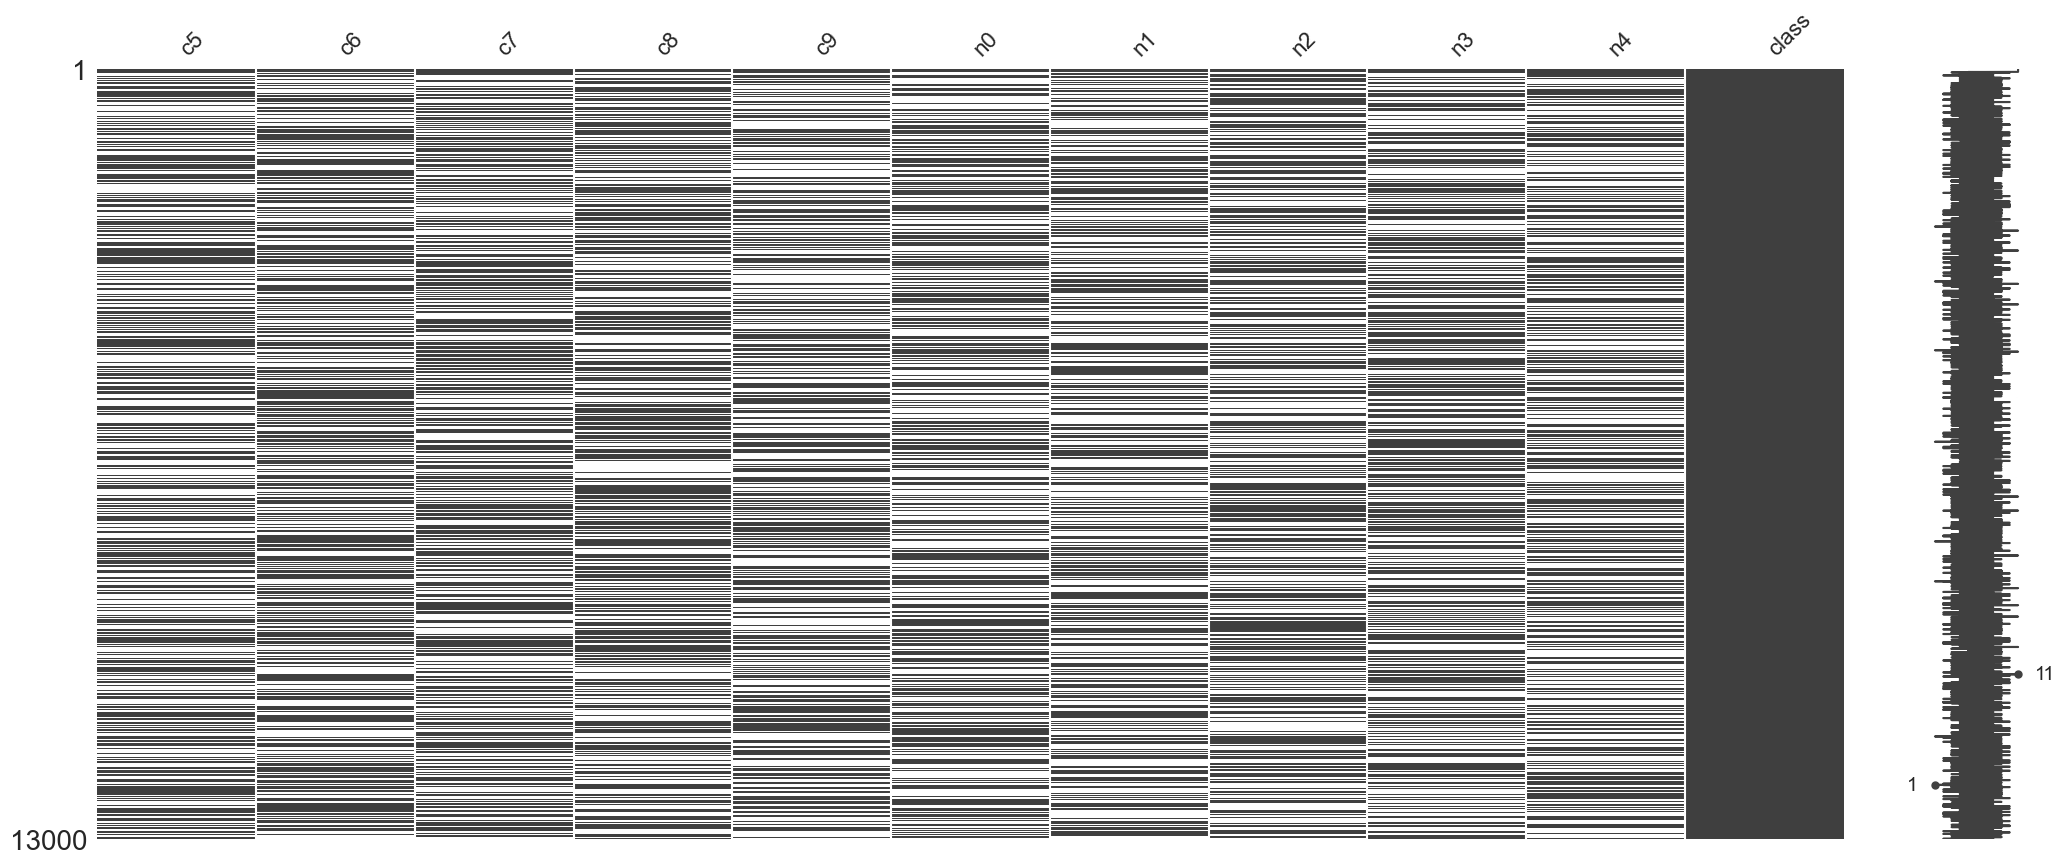

In [ ]:
import missingno as msno

msno.matrix(missing_df)

<Axes: >

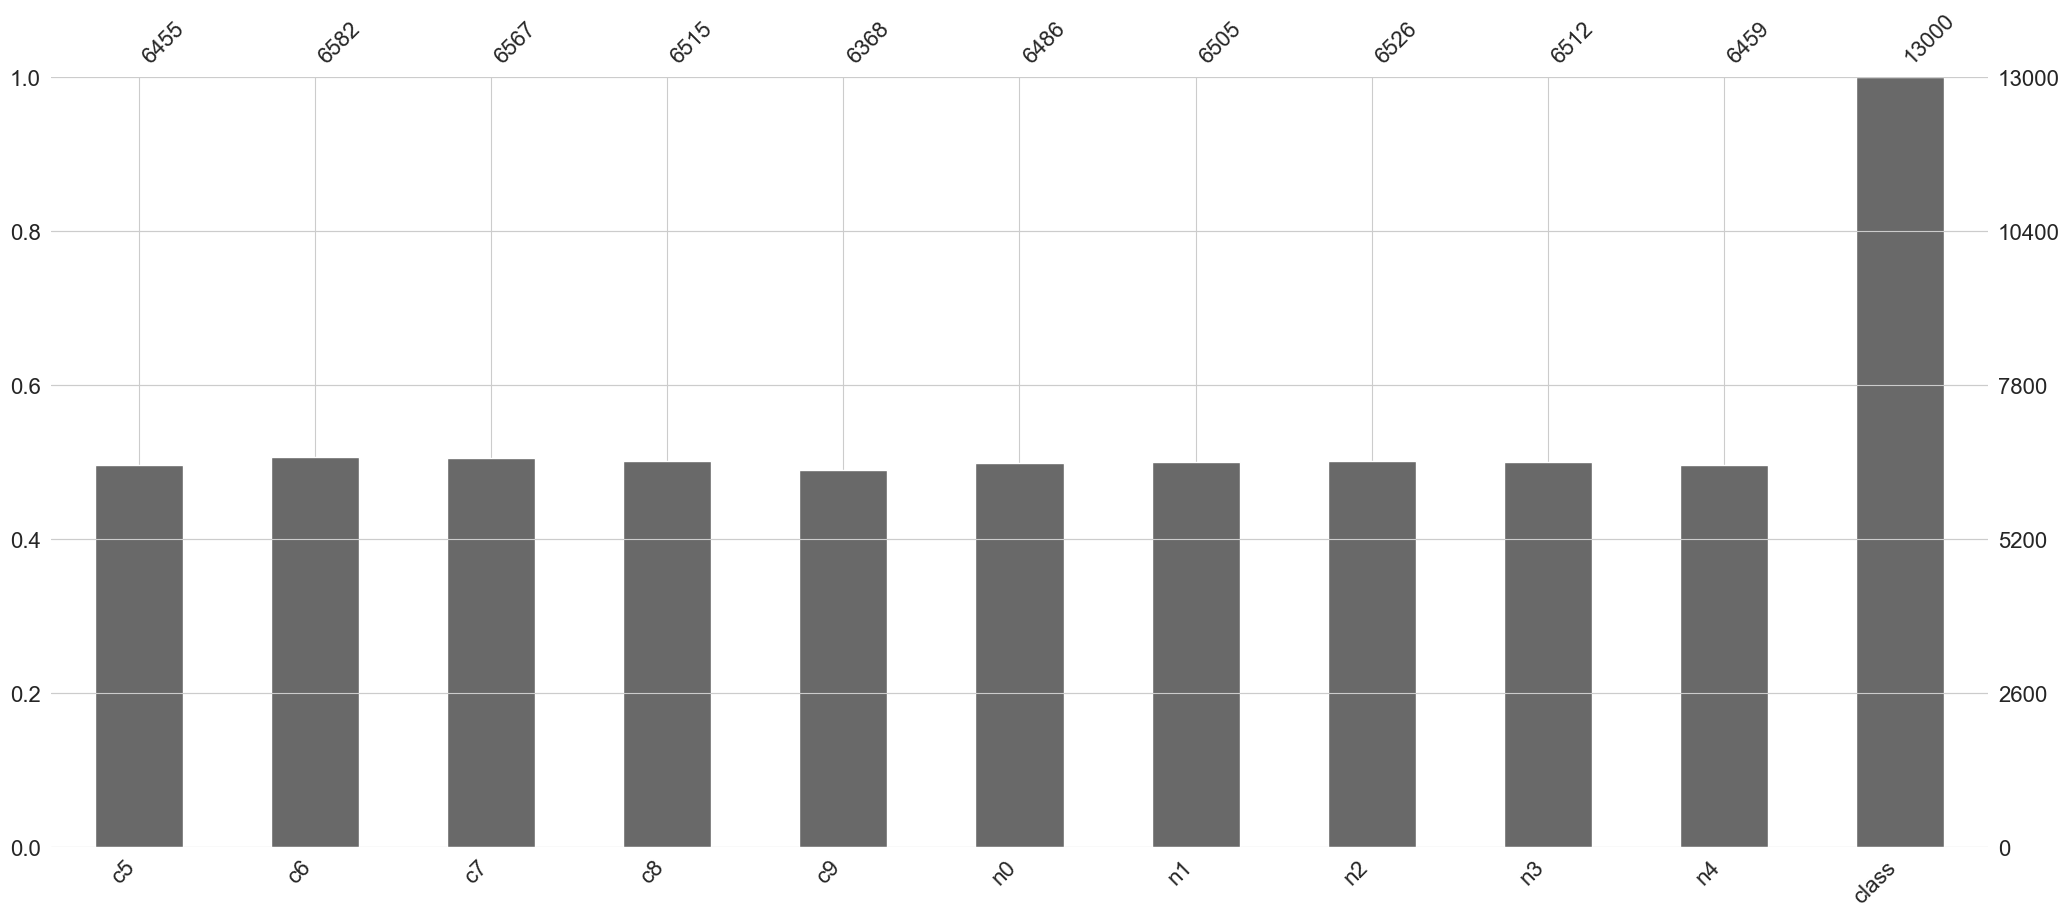

In [ ]:
msno.bar(missing_df)

In [ ]:
def scatter_plot(attribute):
    attr = df[attribute]
    missing_attr = missing_df[attribute]
    missing_mask = np.isnan(missing_attr)
    plt.figure(figsize=(10,6))
    plt.scatter(np.arange(len(attr)),attr,color='blue',label='Not missing',alpha=0.5, s=20)
    plt.scatter(np.where(missing_mask)[0],attr[missing_mask],color='red',label='Missing',alpha=0.5, s=20)
    plt.xlabel('Time Points')
    plt.ylabel(attribute)
    plt.xticks(np.arange(0, 14000, 1000))
    plt.legend()
    plt.show()

In [ ]:
def manual_one_hot_encoding(attribute):
    df[attribute] = df[attribute].replace({'a': 0, 'b': 1})
    missing_df[attribute] = missing_df[attribute].replace({'a': 0, 'b': 1})


In [ ]:
cat_cols = ['c5','c6','c7','c8','c9']
for col in cat_cols:
    manual_one_hot_encoding(col)

/var/folders/0l/hg6b4m094qj3vxjz71xyxprm0000gn/T/ipykernel_32034/951741303.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[attribute] = df[attribute].replace({'a': 0, 'b': 1})
/var/folders/0l/hg6b4m094qj3vxjz71xyxprm0000gn/T/ipykernel_32034/951741303.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  missing_df[attribute] = missing_df[attribute].replace({'a': 0, 'b': 1})


In [ ]:
df


,c5,c6,c7,c8,c9,n0,n1,n2,n3,n4,class
0,0,0,1,0,0,0.448573,1.212644,2.555515,0.242702,0.697604,A
1,0,0,0,1,1,1.902515,-0.467349,-0.744523,-0.017156,-0.380288,A
2,0,0,0,1,1,0.825045,1.002267,1.972207,-0.790095,0.233456,B
3,0,0,0,1,1,-0.124974,0.902601,1.696092,-0.320182,0.243261,A
4,1,0,0,1,0,-1.259765,0.793134,1.547527,-2.132172,-0.788367,B
...,...,...,...,...,...,...,...,...,...,...,...
12995,0,1,1,1,0,-1.259309,-2.780877,-5.843740,-2.715839,-2.509596,A
12996,0,0,0,0,0,-0.129184,-0.629300,-1.315978,0.856377,0.113542,A
12997,1,1,1,0,1,-1.623399,-1.860928,-4.123079,0.073927,-1.146070,B
12998,0,0,0,1,1,0.229875,-0.095758,-0.150269,-0.905269,-0.391985,A


In [ ]:
missing_df

,c5,c6,c7,c8,c9,n0,n1,n2,n3,n4,class
0,0.0,0.0,1.0,0.0,0.0,0.448573,1.212644,2.555515,0.242702,0.697604,0
1,0.0,0.0,0.0,1.0,1.0,1.902515,-0.467349,-0.744523,-0.017156,-0.380288,0
2,0.0,0.0,0.0,1.0,1.0,0.825045,1.002267,1.972207,-0.790095,0.233456,1
3,0.0,0.0,0.0,1.0,1.0,-0.124974,0.902601,1.696092,-0.320182,0.243261,0
4,1.0,0.0,0.0,1.0,0.0,-1.259765,0.793134,1.547527,-2.132172,-0.788367,1
...,...,...,...,...,...,...,...,...,...,...,...
12995,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
12996,0.0,0.0,0.0,0.0,NaN,NaN,-0.629300,-1.315978,0.856377,NaN,0
12997,1.0,1.0,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,1
12998,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0


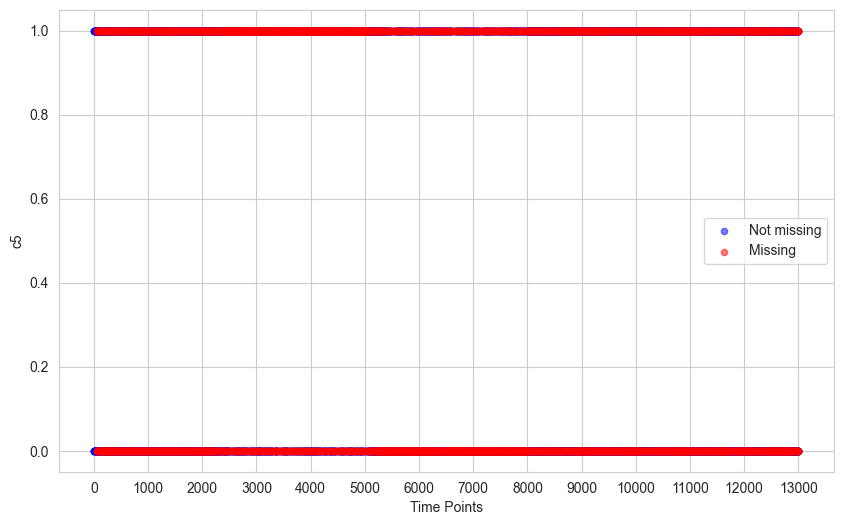

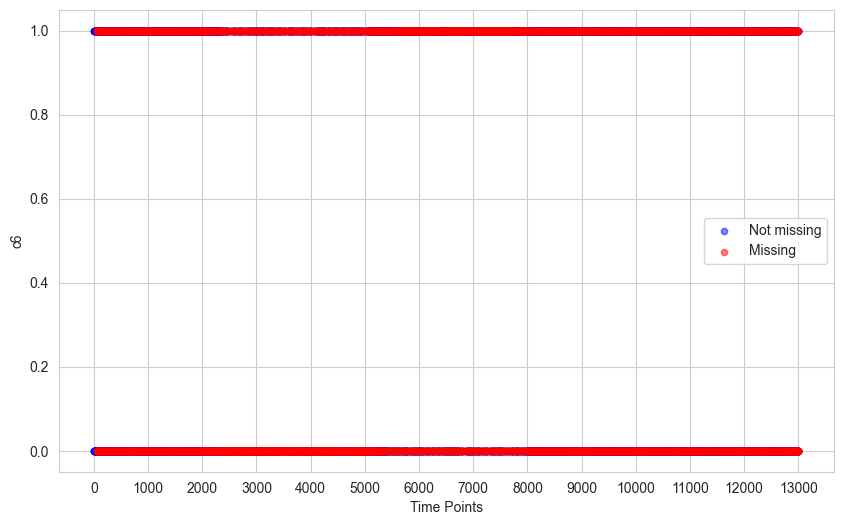

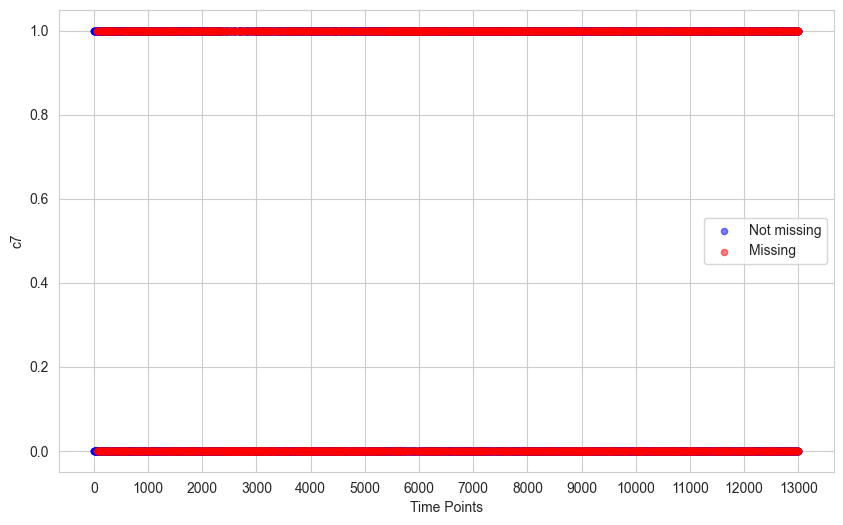

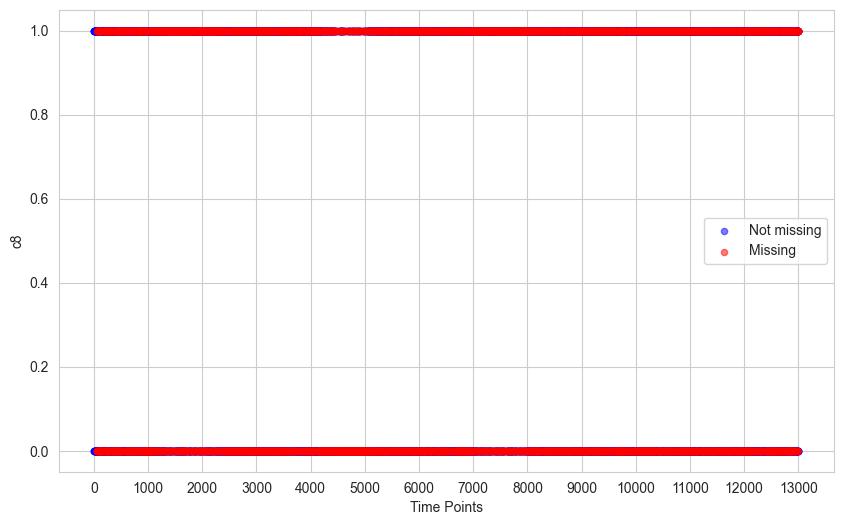

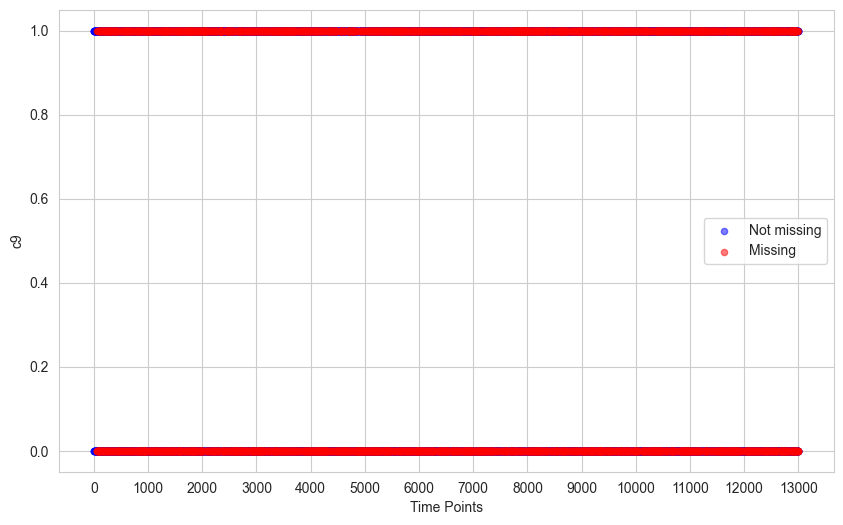

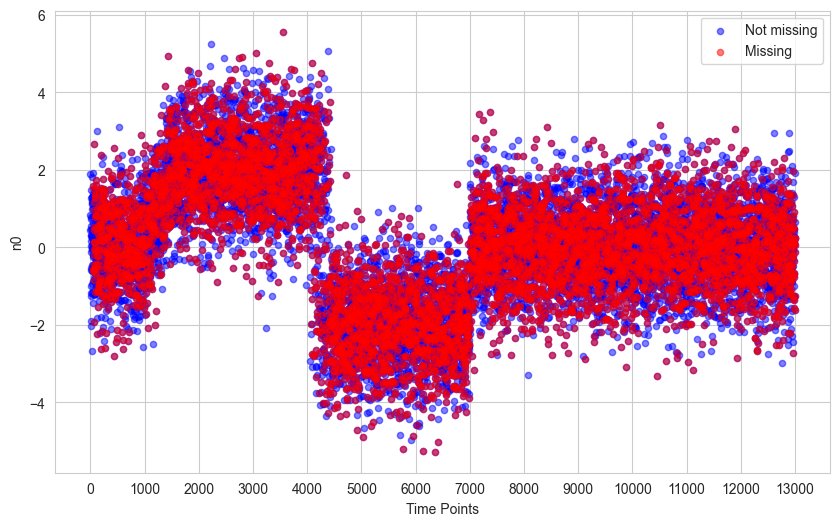

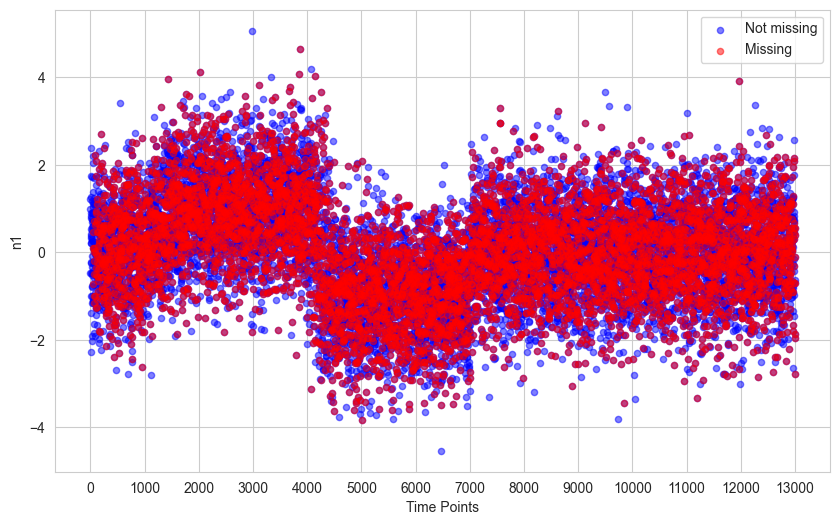

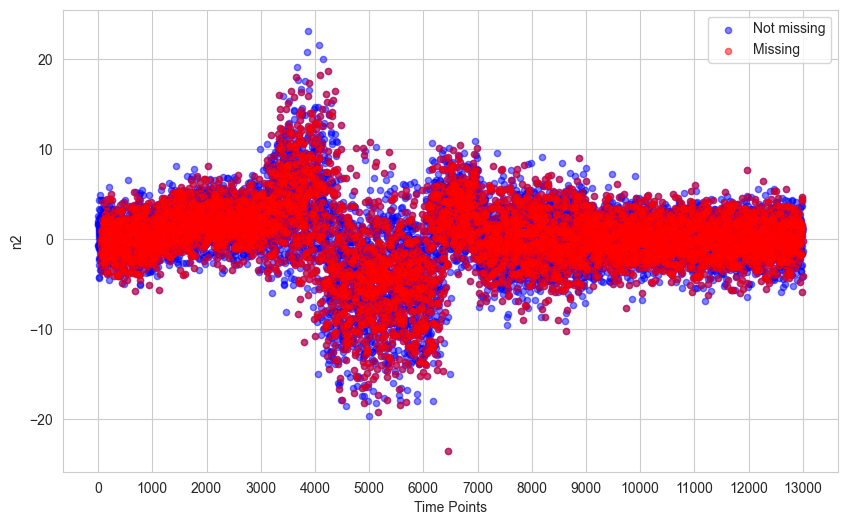

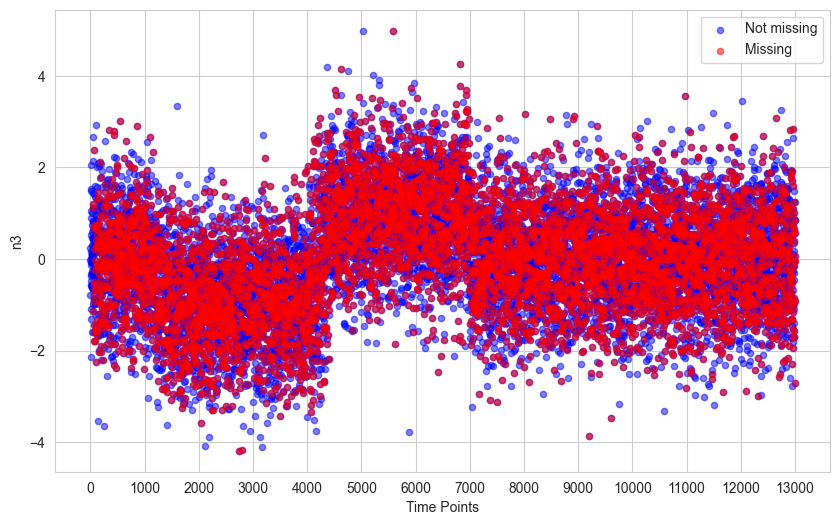

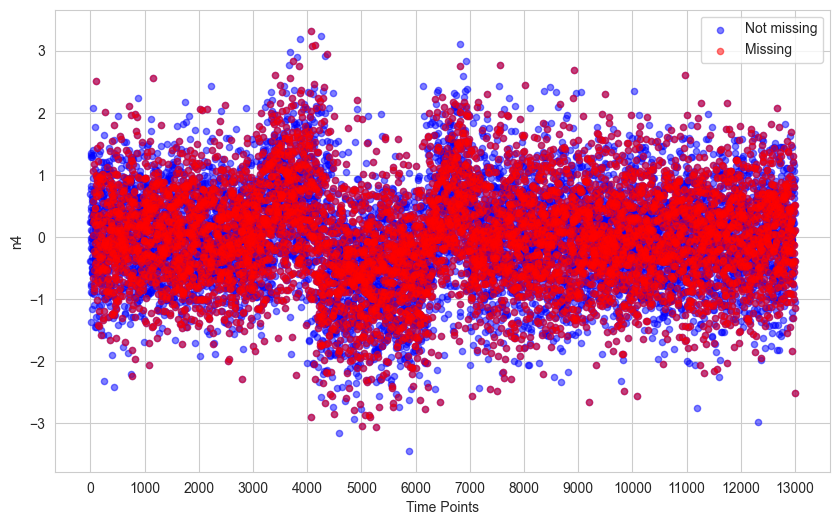

In [ ]:
attributes = ['c5','c6','c7','c8','c9','n0','n1','n2','n3','n4']
for attr in attributes:
    scatter_plot(attr)